# Titanic Project

Calculate the probability of survival of the passenger

In [754]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

## Data Cleaning for train dateset

No concatenation was done between the train and test dataset because the test dataset does not have any information on the survival of the passengers (Survived column all NaN)

In [755]:
titanic_train = pd.read_csv('train.csv')

# titanic = pd.concat([titanic1, titanic2])
# titanic.reset_index()
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Set PassengerId as index

In [756]:
titanic_train.set_index('PassengerId', inplace=True)
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Drop irrelevant columns 

In [757]:
titanic_train = titanic_train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


### Check dtype of columns
- Need to convert float64 to int64 as float64 takes more time and power to process
- Check for NaN values
- As NaN values are present, float64 cannot be converted to int64
- Replace NaN values with median age as the age distibution is normally distributed (countplot figure)

In [758]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


### Fill NaN for Age

In [759]:
titanic_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [760]:
titanic_train['Age'].median()

28.0

In [761]:
titanic_train['Age'].mean()

29.69911764705882

In [762]:
titanic_train['Age'].mode()

0    24.0
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='count'>

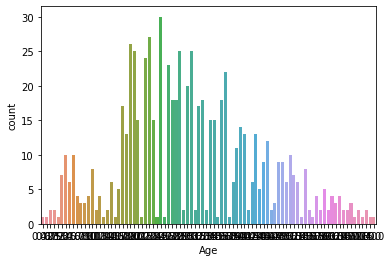

In [763]:
sb.countplot(x='Age', data=titanic_train)

In [764]:
titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)
titanic_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

### Convert float64 to int64

In [765]:
# titanic_train = titanic_train.loc[:, ['Age']].astype('int64') CHANGES ALL COLUMNS 
titanic_train.Age = titanic_train.loc[:, ['Age']].astype('int64')
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


### Fill NaN for Embarked

In [766]:
titanic_train['Embarked'].mode() # Give series
# titanic_train['Embarked'].mode()[0] # Give element in series 

0    S
Name: Embarked, dtype: object

In [767]:
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)
titanic_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [768]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


### One Hot Encoding for Sex

In [769]:
import sklearn as sk

# Importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder

# Creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(titanic_train.Sex.values.reshape(-1,1)).toarray()

# Appending columns
titanic_train[['Female', 'Male']] = pd.DataFrame(X, index = titanic_train.index)

# Drop Sex column
# titanic_train = titanic_train.drop(['Sex'], axis=1) 

# Resulting dataframe
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Female,Male
PassengerId,,,,,,,,,,
1,0,3,male,22,1,0,7.2500,S,0.0,1.0
2,1,1,female,38,1,0,71.2833,C,1.0,0.0
3,1,3,female,26,0,0,7.9250,S,1.0,0.0
4,1,1,female,35,1,0,53.1000,S,1.0,0.0
5,0,3,male,35,0,0,8.0500,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,13.0000,S,0.0,1.0
888,1,1,female,19,0,0,30.0000,S,1.0,0.0
889,0,3,female,28,1,2,23.4500,S,1.0,0.0


### Data Processing of Pclass (KIV)

Catergorise passengers according to Social Economic Status (SES)

SES is determined by Pclass where: 

- 1st = Upper
- 2nd = Middle
- 3rd = Lower

Ordinal variable (have order e.g. catergories/classes/order) so Pclass may not need to undergo one-hot-encoding

In [770]:
# onehotencoder = OneHotEncoder()

# X = onehotencoder.fit_transform(titanic_train.Pclass.values.reshape(-1,1)).toarray()

# titanic_train[['Upper', 'Middle', 'Lower']] = pd.DataFrame(X, index = titanic_train.index)

# titanic_train = titanic_train.drop(['Pclass'], axis=1) 

# titanic_train

### One Hot Encoding for Embarked

In [771]:
onehotencoder = OneHotEncoder()

X = onehotencoder.fit_transform(titanic_train.Embarked.values.reshape(-1,1)).toarray()

titanic_train[['Cherbourg', 'Queenstown', 'Southampton']] = pd.DataFrame(X, index = titanic_train.index)

# titanic_train = titanic_train.drop(['Embarked'], axis=1) 

titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Female,Male,Cherbourg,Queenstown,Southampton
PassengerId,,,,,,,,,,,,,
1,0,3,male,22,1,0,7.2500,S,0.0,1.0,0.0,0.0,1.0
2,1,1,female,38,1,0,71.2833,C,1.0,0.0,1.0,0.0,0.0
3,1,3,female,26,0,0,7.9250,S,1.0,0.0,0.0,0.0,1.0
4,1,1,female,35,1,0,53.1000,S,1.0,0.0,0.0,0.0,1.0
5,0,3,male,35,0,0,8.0500,S,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,13.0000,S,0.0,1.0,0.0,0.0,1.0
888,1,1,female,19,0,0,30.0000,S,1.0,0.0,0.0,0.0,1.0
889,0,3,female,28,1,2,23.4500,S,1.0,0.0,0.0,0.0,1.0


### Convert float64 to int64

In [772]:
# Property -> Make changes to original dataset + No ()
# Method -> Make changes to either original or copied dataset + Have ()

titanic_train.loc[:, ['Female', 'Male', 'Cherbourg', 'Queenstown', 'Southampton']] = titanic_train.loc[:, ['Female', 'Male', 'Cherbourg', 'Queenstown', 'Southampton']].astype('int64')
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    int64  
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Female       891 non-null    int64  
 9   Male         891 non-null    int64  
 10  Cherbourg    891 non-null    int64  
 11  Queenstown   891 non-null    int64  
 12  Southampton  891 non-null    int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 97.5+ KB


### Basic Univariate Statistics Summary

In [773]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Female,Male,Cherbourg,Queenstown,Southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.345679,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.486592,0.836071,13.028212,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Cleaning for test dataset

In [774]:
titanic_test = pd.read_csv('test.csv')
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Set PassengerId as index

In [775]:
titanic_test.set_index('PassengerId', inplace=True)
titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Drop irrelevant columns

In [776]:
titanic_test = titanic_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


### Check dtype of columns

In [777]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


## Data Exploration

Note: sb.pairplot(titanic_train) is not useful

### Heatmap Correlation Matrix

<AxesSubplot:>

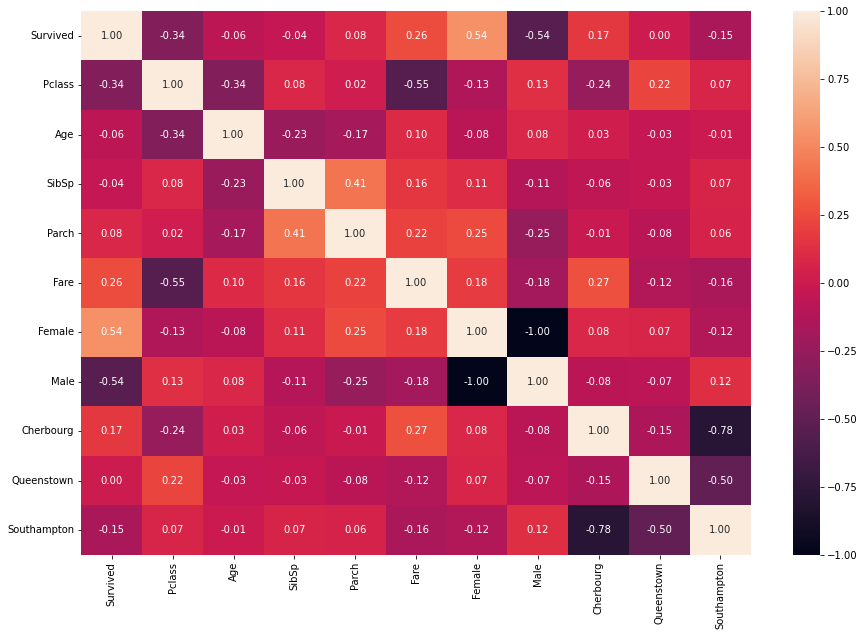

In [778]:
plt.figure(figsize=(15,10))
sb.heatmap(titanic_train.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### Age vs Survived

Numeric vs Categorical: Use histogram and kde

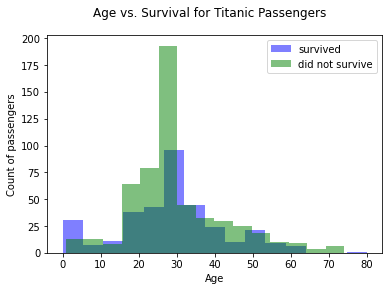

In [779]:
fig, ax = plt.subplots()

ax.hist(titanic_train[titanic_train["Survived"]==1]["Age"], bins=15, alpha=0.5, color="blue", label="survived")
ax.hist(titanic_train[titanic_train["Survived"]==0]["Age"], bins=15, alpha=0.5, color="green", label="did not survive")

# sb.histplot(titanic_train[titanic_train["Survived"]==1]["Age"], bins=15, alpha=0.5, color="blue", label="survived")
# sb.histplot(titanic_train[titanic_train["Survived"]==0]["Age"], bins=15, alpha=0.5, color="green", label="did not survive")

ax.set_xlabel("Age")
ax.set_ylabel("Count of passengers")

fig.suptitle("Age vs. Survival for Titanic Passengers")

ax.legend() 

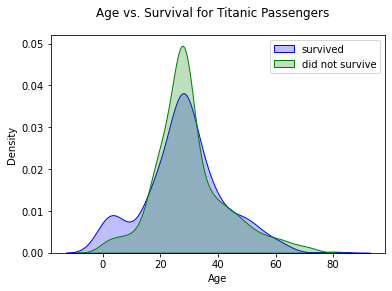

In [780]:
fig, ax = plt.subplots()

sb.kdeplot(titanic_train[titanic_train["Survived"]==1]["Age"], shade=True, color="blue", label="survived", ax=ax)
sb.kdeplot(titanic_train[titanic_train["Survived"]==0]["Age"], shade=True, color="green", label="did not survive", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Survival for Titanic Passengers")

ax.legend()

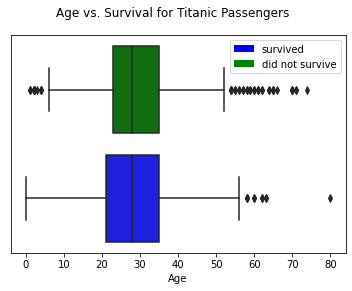

In [781]:
from matplotlib.patches import Patch

fig, ax = plt.subplots()

sb.boxplot(x="Age", y="Survived", data=titanic_train, orient="h", palette={1:"blue", 0:"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Survival for Titanic Passengers")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches)

### Pclass vs Survived

Categorical vs Categorical: Use bar charts (categorical plot)

Text(0.5, 0.98, 'Passenger Class vs. Survival for Titanic Passengers')

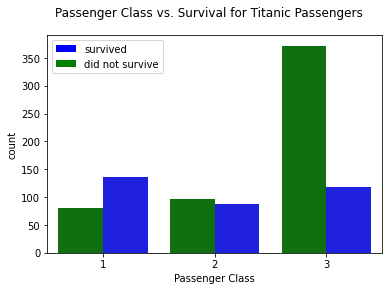

In [782]:
fig, ax = plt.subplots()

sb.countplot(x="Pclass", hue="Survived", data=titanic_train, 
            palette={1:"blue", 0:"green"}, ax=ax)

ax.set_xlabel("Passenger Class")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches)

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers")

In [783]:
# Who died
titanic_train[(titanic_train["Survived"]==1) & (titanic_train['Pclass'] == 1)]['Pclass'].count()
# Who survived
groupByDf = titanic_train.groupby(['Pclass', 'Survived']).count()
# pclass_1_survived = titanic_train.loc[(titanic_train["Survived"]==0) & (titanic_train['Pclass'] == 1)]['Pclass']
# pclass_1_survived

survivalBasedOnPClass = groupByDf.iloc[:, 1]
survivalBasedOnPClass = survivalBasedOnPClass.to_frame('Count')
survivalBasedOnPClass


Count
Pclass Survived       
1      0            80
       1           136
2      0            97
       1            87
3      0           372
       1           119

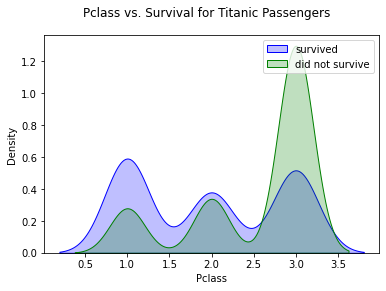

In [784]:
fig, ax = plt.subplots()

sb.kdeplot(titanic_train[titanic_train["Survived"]==1]["Pclass"], shade=True, color="blue", label="survived", ax=ax)
sb.kdeplot(titanic_train[titanic_train["Survived"]==0]["Pclass"], shade=True, color="green", label="did not survive", ax=ax)

ax.set_xlabel("Pclass")
ax.set_ylabel("Density")

fig.suptitle("Pclass vs. Survival for Titanic Passengers")

ax.legend()

### SibSp vs Survived

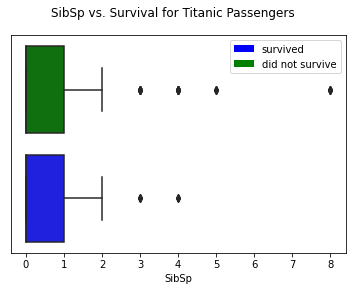

In [785]:
from matplotlib.patches import Patch

fig, ax = plt.subplots()

sb.boxplot(x="SibSp", y="Survived", data=titanic_train, orient="h", palette={1:"blue", 0:"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("SibSp vs. Survival for Titanic Passengers")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches)

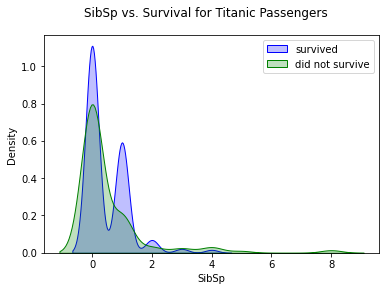

In [786]:
fig, ax = plt.subplots()

sb.kdeplot(titanic_train[titanic_train["Survived"]==1]["SibSp"], shade=True, color="blue", label="survived", ax=ax)
sb.kdeplot(titanic_train[titanic_train["Survived"]==0]["SibSp"], shade=True, color="green", label="did not survive", ax=ax)

ax.set_xlabel("SibSp")
ax.set_ylabel("Density")

fig.suptitle("SibSp vs. Survival for Titanic Passengers")

ax.legend()

Text(0.5, 0.98, 'Sibling Spouse vs. Survival for Titanic Passengers')

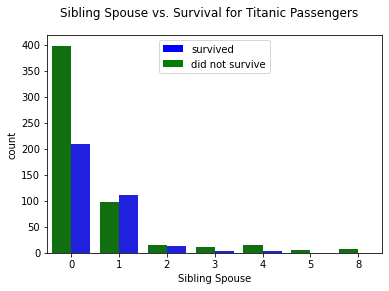

In [787]:
fig, ax = plt.subplots()

sb.countplot(x="SibSp", hue="Survived", data=titanic_train, 
            palette={1:"blue", 0:"green"}, ax=ax)

ax.set_xlabel("Sibling Spouse")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches)

fig.suptitle("Sibling Spouse vs. Survival for Titanic Passengers")

In [788]:
# Who died
titanic_train[(titanic_train["Survived"]==1) & (titanic_train['SibSp'] == 1)]['SibSp'].count()
# Who survived
groupByDf = titanic_train.groupby(['SibSp', 'Survived']).count()
# pclass_1_survived = titanic_train.loc[(titanic_train["Survived"]==0) & (titanic_train['SibSp'] == 1)]['SibSp']
# pclass_1_survived

survivalBasedOnSibSp = groupByDf.iloc[:, 1]
survivalBasedOnSibSp = survivalBasedOnSibSp.to_frame('Count')
survivalBasedOnSibSp

Count
SibSp Survived       
0     0           398
      1           210
1     0            97
      1           112
2     0            15
      1            13
3     0            12
      1             4
4     0            15
      1             3
5     0             5
8     0             7

### Parch vs Survived

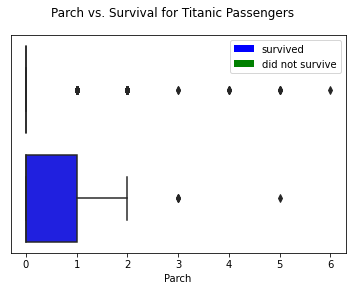

In [789]:
from matplotlib.patches import Patch

fig, ax = plt.subplots()

sb.boxplot(x="Parch", y="Survived", data=titanic_train, orient="h", palette={1:"blue", 0:"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Parch vs. Survival for Titanic Passengers")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches)

Text(0.5, 0.98, 'Parent Child vs. Survival for Titanic Passengers')

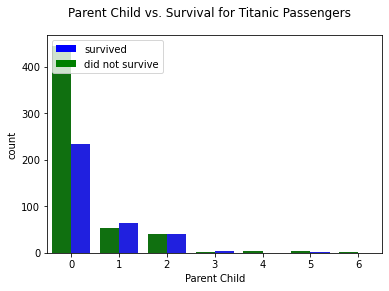

In [790]:
fig, ax = plt.subplots()

sb.countplot(x="Parch", hue="Survived", data=titanic_train, 
            palette={1:"blue", 0:"green"}, ax=ax)

ax.set_xlabel("Parent Child")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches)

fig.suptitle("Parent Child vs. Survival for Titanic Passengers")

In [791]:
# Who died
titanic_train[(titanic_train["Survived"]==1) & (titanic_train['Parch'] == 1)]['Parch'].count()
# Who survived
groupByDf = titanic_train.groupby(['Parch', 'Survived']).count()
# pclass_1_survived = titanic_train.loc[(titanic_train["Survived"]==0) & (titanic_train['SibSp'] == 1)]['SibSp']
# pclass_1_survived

survivalBasedOnParch = groupByDf.iloc[:, 1]
survivalBasedOnParch = survivalBasedOnParch.to_frame('Count')
survivalBasedOnParch

Count
Parch Survived       
0     0           445
      1           233
1     0            53
      1            65
2     0            40
      1            40
3     0             2
      1             3
4     0             4
5     0             4
      1             1
6     0             1

### Fare vs Survived

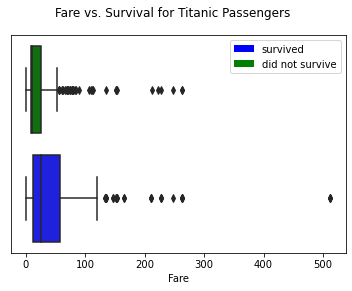

In [792]:
from matplotlib.patches import Patch

fig, ax = plt.subplots()

sb.boxplot(x="Fare", y="Survived", data=titanic_train, orient="h", palette={1:"blue", 0:"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Fare vs. Survival for Titanic Passengers")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches)

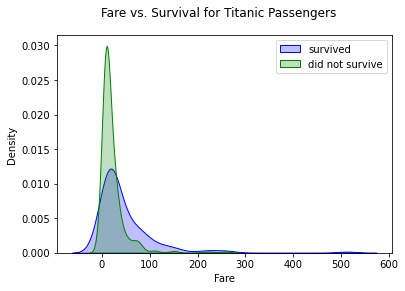

In [793]:
fig, ax = plt.subplots()

sb.kdeplot(titanic_train[titanic_train["Survived"]==1]["Fare"], shade=True, color="blue", label="survived", ax=ax)
sb.kdeplot(titanic_train[titanic_train["Survived"]==0]["Fare"], shade=True, color="green", label="did not survive", ax=ax)

ax.set_xlabel("Fare")
ax.set_ylabel("Density")

fig.suptitle("Fare vs. Survival for Titanic Passengers")

ax.legend()

### Sex vs Survived

In [794]:
# SHIT GRAPH
# fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# sb.kdeplot(titanic_train[titanic_train["Survived"]==1]["Female"], shade=True, color="blue", label="survived", ax=ax[0])
# sb.kdeplot(titanic_train[titanic_train["Survived"]==0]["Female"], shade=True, color="green", label="did not survive", ax=ax[0])

# sb.kdeplot(titanic_train[titanic_train["Survived"]==1]["Male"], shade=True, color="blue", label="survived", ax=ax[1])
# sb.kdeplot(titanic_train[titanic_train["Survived"]==0]["Male"], shade=True, color="green", label="did not survive", ax=ax[1])

# ax[0].set_xlabel("Female")
# ax[1].set_xlabel("Male")
# ax[0].set_ylabel("Density")
# ax[1].set_ylabel("Density")

# fig.suptitle("Sex vs. Survival for Titanic Passengers")

Text(0.5, 0.98, 'Sex vs. Survival for Titanic Passengers')

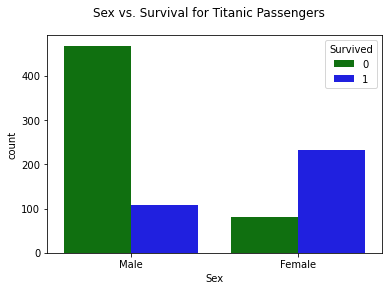

In [795]:
fig, ax = plt.subplots()

sb.countplot(x="Female", hue="Survived", data=titanic_train, 
            palette={1:"blue", 0:"green"}, ax=ax)

ax.set_xticklabels(["Male", "Female"])
ax.set_xlabel("Sex")

fig.suptitle("Sex vs. Survival for Titanic Passengers")

In [796]:
# titanic_train[(titanic_train["Survived"]==1) & (titanic_train['Sex'] == 1)].count()

groupByDf = titanic_train.groupby(['Sex', 'Survived']).count()

survivalBasedOnSex = groupByDf.iloc[:, 1]
survivalBasedOnSex = survivalBasedOnSex.to_frame('Count')
survivalBasedOnSex

Count
Sex    Survived       
female 0            81
       1           233
male   0           468
       1           109

### Embarked vs Survived

Text(0.5, 0.98, 'Embarked vs. Survival for Titanic Passengers')

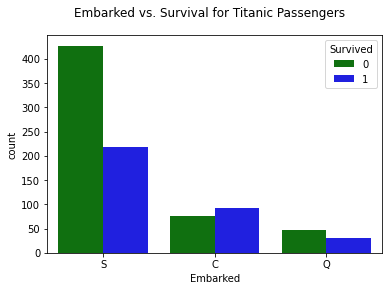

In [797]:
fig, ax = plt.subplots()

sb.countplot(x="Embarked", hue="Survived", data=titanic_train, 
            palette={1:"blue", 0:"green"}, ax=ax)

# ax.set_xticklabels(["Not Queenstown", "Queenstown"])
ax.set_xlabel("Embarked")

fig.suptitle("Embarked vs. Survival for Titanic Passengers")

In [798]:
groupByDf = titanic_train.groupby(['Embarked', 'Survived']).count()

survivalBasedOnEmbarked = groupByDf.iloc[:, 1]
survivalBasedOnEmbarked = survivalBasedOnEmbarked.to_frame('Count')
survivalBasedOnEmbarked

Count
Embarked Survived       
C        0            75
         1            93
Q        0            47
         1            30
S        0           427
         1           219

### Data Exploration Findings

1. Age vs Survived:
    - Generally more people did not survive than those in the same age group that survived
    - Age 25-30 had the highest mortality rate, this is consistent to the initial finding that age 28 is the mean and median age 
    - Age 0-5 and age 30 have a survival rate than mortality rate this could be because of these groups evacuated earlier
    - Age has a low correlation score of -0.06 wrt survival, however more can be explored

<break> 

2. Pclass vs Survived:
    - Pclass 1 has a higher survival rate tha mortality rate
    - Pclass 2 has a similar survival rate to mortality rate
    - Pclass 3 has a lower survival rate to mortality rate
    - Pclass is highly correlated to survival, with correlation of -0.34
    - Correlation of Pclass to Sex is also high, with females being -0.13 and with males being 0.13

<break> 

3. SibSp vs Survived:
    - Generally the mortality rate is higher than the survival rate regardless of number of siblings and spouses
    - SibSp is not an important factor and can be dropped

<break>

4. Parch vs Survived:
    - The mortality rate is much higher than the survival rate for people who have no parent/child on board 
    - Otherwise, mortality rate and survival rate are the similar
    - Parch is not an important factor and can be dropped

<break>

5. Fare vs Survived:
    - Those with higher fare survived generally survived 
    - More people from the low fare range died, but they also make up the majority of passengers

<break>

6. Sex vs Survived:

<break>

7. Embarked vs Survived:

### Variance Inflation Factor (VIF)

Measure the multicollinearity of the independent variable with respect to each other

Multicollinearity causes:
- wider bandwidth (larger standard error)
- double-counting the effect of the highly correlated variables

<break> 
Therefore, coefficients/estimates/statistical power of machine learning model will not be accurate

In [812]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = titanic_train.loc[:, ~titanic_train.columns.isin(['Survived', 'Sex', 'Embarked', 'Male'])]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Pclass,3.986728
1,Age,3.928314
2,SibSp,1.568453
3,Parch,1.629781
4,Fare,1.883745
5,Female,1.653459
6,Cherbourg,1.353195
7,Queenstown,1.188351


In [813]:
# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.regression.linear_model import OLS
# from statsmodels.tools.tools import add_constant

# ALTERNATIVE
# constant = add_constant(titanic_train)

# pd.Series([variance_inflation_factor(constant.values, i) 
#                for i in range(constant.shape[1])], 
#               index=constant.columns)

# ALTERNATIVE
# def variance_inflation_factors(df):

#     df = add_constant(df)
#     vifs = pd.Series(
#         [(1 / (1 - OLS(df[col].values), df.loc[:, df.columns != col].values).fit().rsquared) for col in df],
#         index=df.columns,
#         name='VIF'
#     )
#     return vifs

# variance_inflation_factors(titanic_train)

# inf represents infinity, which means the variable is perfectly multicollinear

### Drop less important variables/highly correlated variables
- Southampton vif is very high so it will be dropped
- Male is also dropped as it is complement to Female (under Female column: 1 is Female, 0 is not Female aka Male)

In [811]:
titanic_train = titanic_train.drop(['Male', 'Southampton'], axis=1)
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Female,Cherbourg,Queenstown
PassengerId,,,,,,,,,,,
1,0,3,male,22,1,0,7.2500,S,0,0,0
2,1,1,female,38,1,0,71.2833,C,1,1,0
3,1,3,female,26,0,0,7.9250,S,1,0,0
4,1,1,female,35,1,0,53.1000,S,1,0,0
5,0,3,male,35,0,0,8.0500,S,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,13.0000,S,0,0,0
888,1,1,female,19,0,0,30.0000,S,1,0,0
889,0,3,female,28,1,2,23.4500,S,1,0,0


## Machine Learning

### K Nearest Neighbour (KNN)

- supervised learning
- k = number of nearest neighbours we will consider (k=5, we look at 5 of the data points which are closest to the random data point we want to classify)

#### KNN Algorithm
1. Load the data
2. Initialize k 
3. KNeighborsClassifier

#### Advantages
1. The algorithm is simple and easy to implement
2. There’s no need to build a model, tune several parameters, or make additional assumptions
3. The algorithm is versatile. It can be used for classification, regression, and search
#### Disadvantages
1. The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase

#### Hyperparameter tuning
- K fold cross validation vs GridSearchCV vs RandomSearchCV: https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/
- GridSearchCV vs RandomSearchCV: https://analyticsindiamag.com/guide-to-hyperparameters-tuning-using-gridsearchcv-and-randomizedsearchcv/

In [847]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = titanic_train.loc[:, ~titanic_train.columns.isin(['Survived', 'Sex', 'Embarked', 'Male'])]
y = titanic_train.loc[:, 'Survived']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
 
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)
 
# Predict on dataset which model has not seen before
# print(knn.predict(X_test))

[0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1]


In [848]:
knn_train_score = knn.score(X_train, y_train)
print(f"accuracy score for train: {knn_train_score}")

knn_test_score = knn.score(X_test, y_test)
print(f"accuracy score for test: {knn_test_score}")

accuracy score for train: 0.7570224719101124
accuracy score for test: 0.7150837988826816


In [852]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
grid = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = grid.fit(X,y)
#Print The value of best Hyperparameters
# print('Best leaf_size:', best_model.best_params_()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

print(best_model.best_params_)

{'leaf_size': 4, 'n_neighbors': 3, 'p': 1}


In [855]:
knn_new = KNeighborsClassifier(leaf_size=4, n_neighbors=3, p=1)

knn_new.fit(X_train, y_train)

knn_new_train_score = knn_new.score(X_train, y_train)
print(f"accuracy score for train: {knn_new_train_score}")

knn_new_test_score = knn_new.score(X_test, y_test)
print(f"accuracy score for test: {knn_new_test_score}")

accuracy score for train: 0.8497191011235955
accuracy score for test: 0.7206703910614525


### Random Forest Classifier

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9691011235955056

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8268156424581006



<AxesSubplot:>

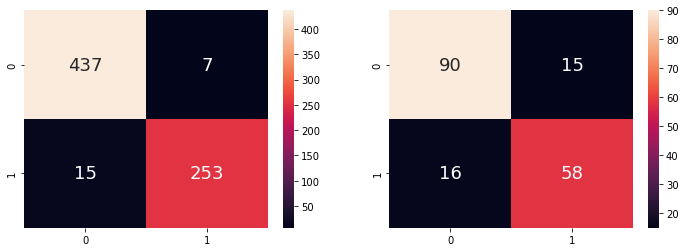

In [856]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=10)

rf_clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf_clf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf_clf.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [857]:
#List Hyperparameters that we want to tune.
n_estimators = list(range(1,30))
criterion = ['gini', 'entropy', 'log_loss']
#Convert to dictionary
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion)
#Create new KNN object
rf_clf_2 = RandomForestClassifier()
#Use GridSearch
grid = GridSearchCV(rf_clf_2, hyperparameters, cv=10)
#Fit the model
best_model = grid.fit(X,y)
#Print The value of best Hyperparameters
# print('Best leaf_size:', best_model.best_params_()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

print(best_model.best_params_)

{'criterion': 'log_loss', 'n_estimators': 20}


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9719101123595506

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8212290502793296



<AxesSubplot:>

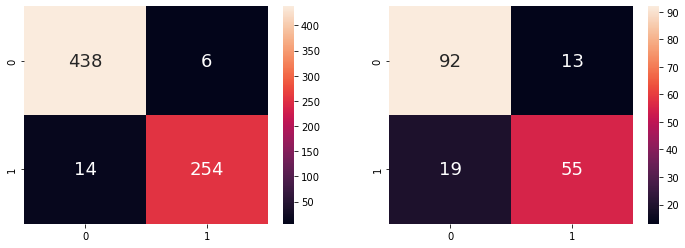

In [858]:
rf_clf_new = RandomForestClassifier(n_estimators=20, criterion='log_loss')

rf_clf_new.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_train_pred = rf_clf_new.predict(X_train)
y_test_pred = rf_clf_new.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf_clf_new.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf_clf_new.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Test Machine Learning Model

In [859]:
titanic_test = pd.read_csv('test.csv')
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Takeaways

#### One-hot-encoding
- Extract out a category and convert to 0 and 1

#### Supervised vs Unsupervised Learning
- unsupervised learning trains raw and unlabelled data, used to identify patterns and trends in datasets, detect outliers (e.g. Kmeans clustering)
- supervised learning requires labelled input and output data, trained to learn trends, can predict outcomes from new and unseen data (e.g. KNN)

#### Exclude columns but don't drop unless really unnecessary
- use loc or iloc

#### Hyperparameter tuning
- hyperparameters control the machine learning process e.g. k in KNN/Kmeans, depth in random forest
- fine tune using GridSearchCV or RandomSearchCV

#### To-learn
- make use of generic functions + use functions to create a pipeline

# References

Guide:
- https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
- https://towardsdatascience.com/a-case-for-altruism-on-the-high-seas-and-other-interesting-stories-970a04444db2

- AWS Sagemaker

### 